                    Predictive Analysis Using Machine Learning

Import Required Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load Dataset

In [3]:
# Load dataset
df = pd.read_csv("creditcard.csv")

# View first rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Basic Data Exploration

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91200 entries, 0 to 91199
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    91200 non-null  int64  
 1   V1      91200 non-null  float64
 2   V2      91200 non-null  float64
 3   V3      91200 non-null  float64
 4   V4      91200 non-null  float64
 5   V5      91200 non-null  float64
 6   V6      91200 non-null  float64
 7   V7      91200 non-null  float64
 8   V8      91200 non-null  float64
 9   V9      91200 non-null  float64
 10  V10     91200 non-null  float64
 11  V11     91200 non-null  float64
 12  V12     91200 non-null  float64
 13  V13     91200 non-null  float64
 14  V14     91200 non-null  float64
 15  V15     91199 non-null  float64
 16  V16     91199 non-null  float64
 17  V17     91199 non-null  float64
 18  V18     91199 non-null  float64
 19  V19     91199 non-null  float64
 20  V20     91199 non-null  float64
 21  V21     91199 non-null  float64
 22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,...,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,40218.724474,-0.263489,-0.040218,0.677104,0.162761,-0.279624,0.094647,-0.108948,0.054542,-0.033586,...,-0.029791,-0.107291,-0.037484,0.009603,0.132399,0.027111,0.001449,0.002511,98.836868,0.002314
std,16208.216858,1.871579,1.662459,1.347185,1.357217,1.370698,1.303795,1.228957,1.214456,1.125841,...,0.727355,0.635203,0.626381,0.594322,0.441172,0.496222,0.389847,0.325301,268.042772,0.048045
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,32437.750000,-1.028050,-0.605011,0.180264,-0.718001,-0.898175,-0.646850,-0.601624,-0.139681,-0.694838,...,-0.224139,-0.527338,-0.177541,-0.321921,-0.132304,-0.325760,-0.063155,-0.005671,7.610000,0.000000
50%,42416.000000,-0.259193,0.072606,0.758381,0.186746,-0.313804,-0.156329,-0.070197,0.071889,-0.105892,...,-0.057803,-0.082281,-0.049619,0.064768,0.171213,-0.070650,0.009497,0.023228,26.980000,0.000000
75%,52976.250000,1.152942,0.727724,1.383181,1.035486,0.252585,0.488617,0.415907,0.355994,0.582092,...,0.119049,0.309107,0.081231,0.405899,0.420183,0.305754,0.082692,0.076445,89.980000,0.000000
max,63354.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [5]:
# Check class distribution
df['Class'].value_counts()


,count
Class,
0.0,90988
1.0,211


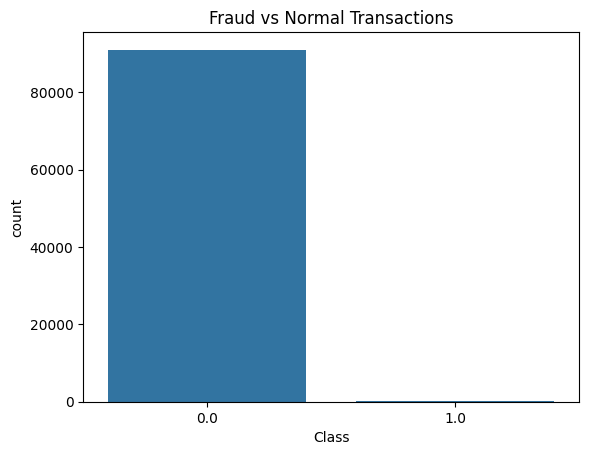

In [6]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal Transactions")
plt.show()


Feature Selection

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']


Feature Scaling

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
df['Class'].isna().sum()


np.int64(1)

In [11]:
df.isna().sum()



,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [12]:
df = df.dropna(subset=['Class'])


In [13]:
df = df.dropna()


In [14]:
X = df.drop('Class', axis=1)
y = df['Class']


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
#Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
#Model Prediction
y_pred = model.predict(X_test)

Accuracy: 0.9985197368421053
Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18198
         1.0       0.74      0.55      0.63        42

    accuracy                           1.00     18240
   macro avg       0.87      0.77      0.81     18240
weighted avg       1.00      1.00      1.00     18240



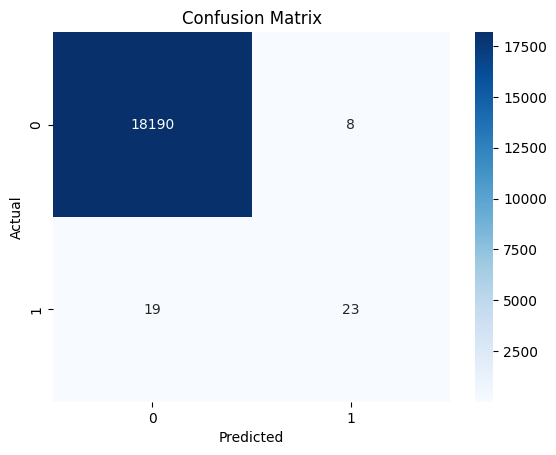

In [19]:
#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
#Prediction on New Transaction
# Example transaction (random sample)
sample = X.iloc[0:1]
sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)

if prediction[0] == 1:
    print("Fraud Transaction")
else:
    print("Normal Transaction")

Normal Transaction


Results

1.Successfully detected fraudulent transactions

2.Logistic Regression performs well on PCA-based features

3.Dataset is highly imbalanced, accuracy alone is not enough → precision & recall are important